<a href="https://colab.research.google.com/github/isha-ingersol/ComputerVisionAndImaging/blob/main/CVI_Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Appendix
###Task 1 Code


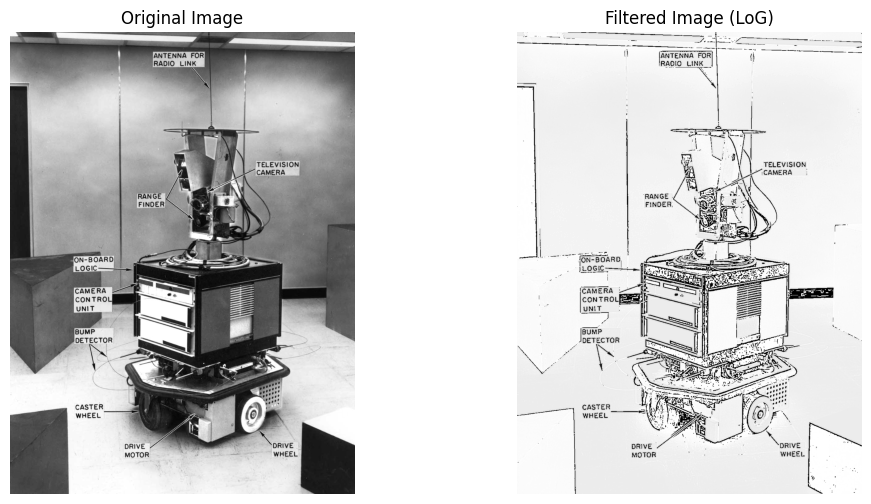

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.ndimage import convolve
# Load the image
image_path = "/content/shakey.150.gif"
try:
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if image is grayscale or color
        image_gray = color.rgb2gray(image)  # Convert color image to grayscale
    else:
        image_gray = image  # Don't convert the image if in grayscale
except Exception as e:
    print("Error:", e)
    image_gray = None
if image_gray is not None:
    # Define function to create LoG filter mask
    def LoG_filter(size, sigma):
        x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
        mask = -(1 / (np.pi * sigma ** 4)) * (1 - (x ** 2 + y ** 2) / (2 * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
        return mask
    # Create and apply LoG filter
    filter_size = 7
    sigma = 1.4
    LoG_mask = LoG_filter(filter_size, sigma)
    filtered_image = convolve(image_gray, LoG_mask, mode='nearest')
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image (LoG)')
    plt.axis('off')
    plt.show()
else:
    print("Unable to load image.")

###Task 2 Code


Processing 10905 JL.bmp:


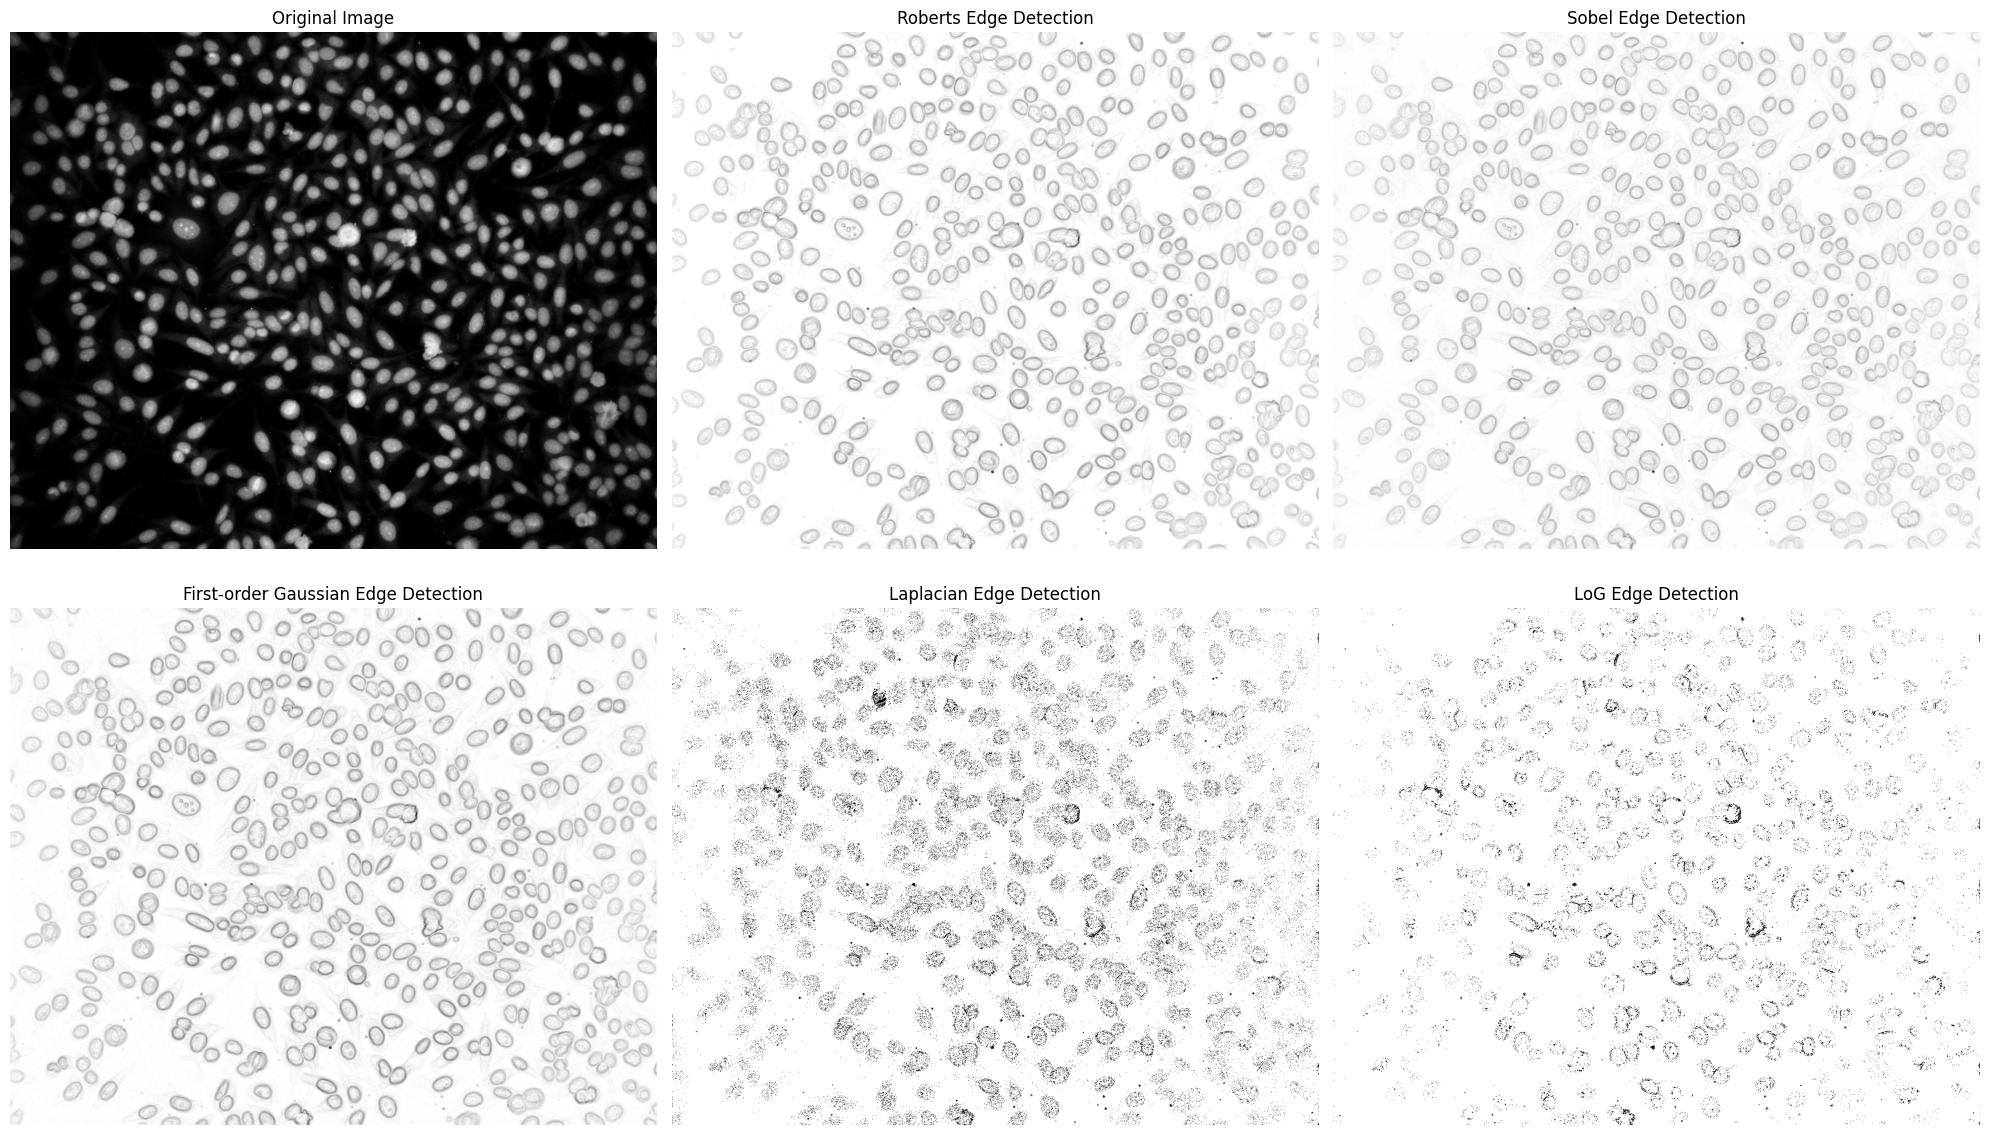


Processing 43590 AM.bmp:


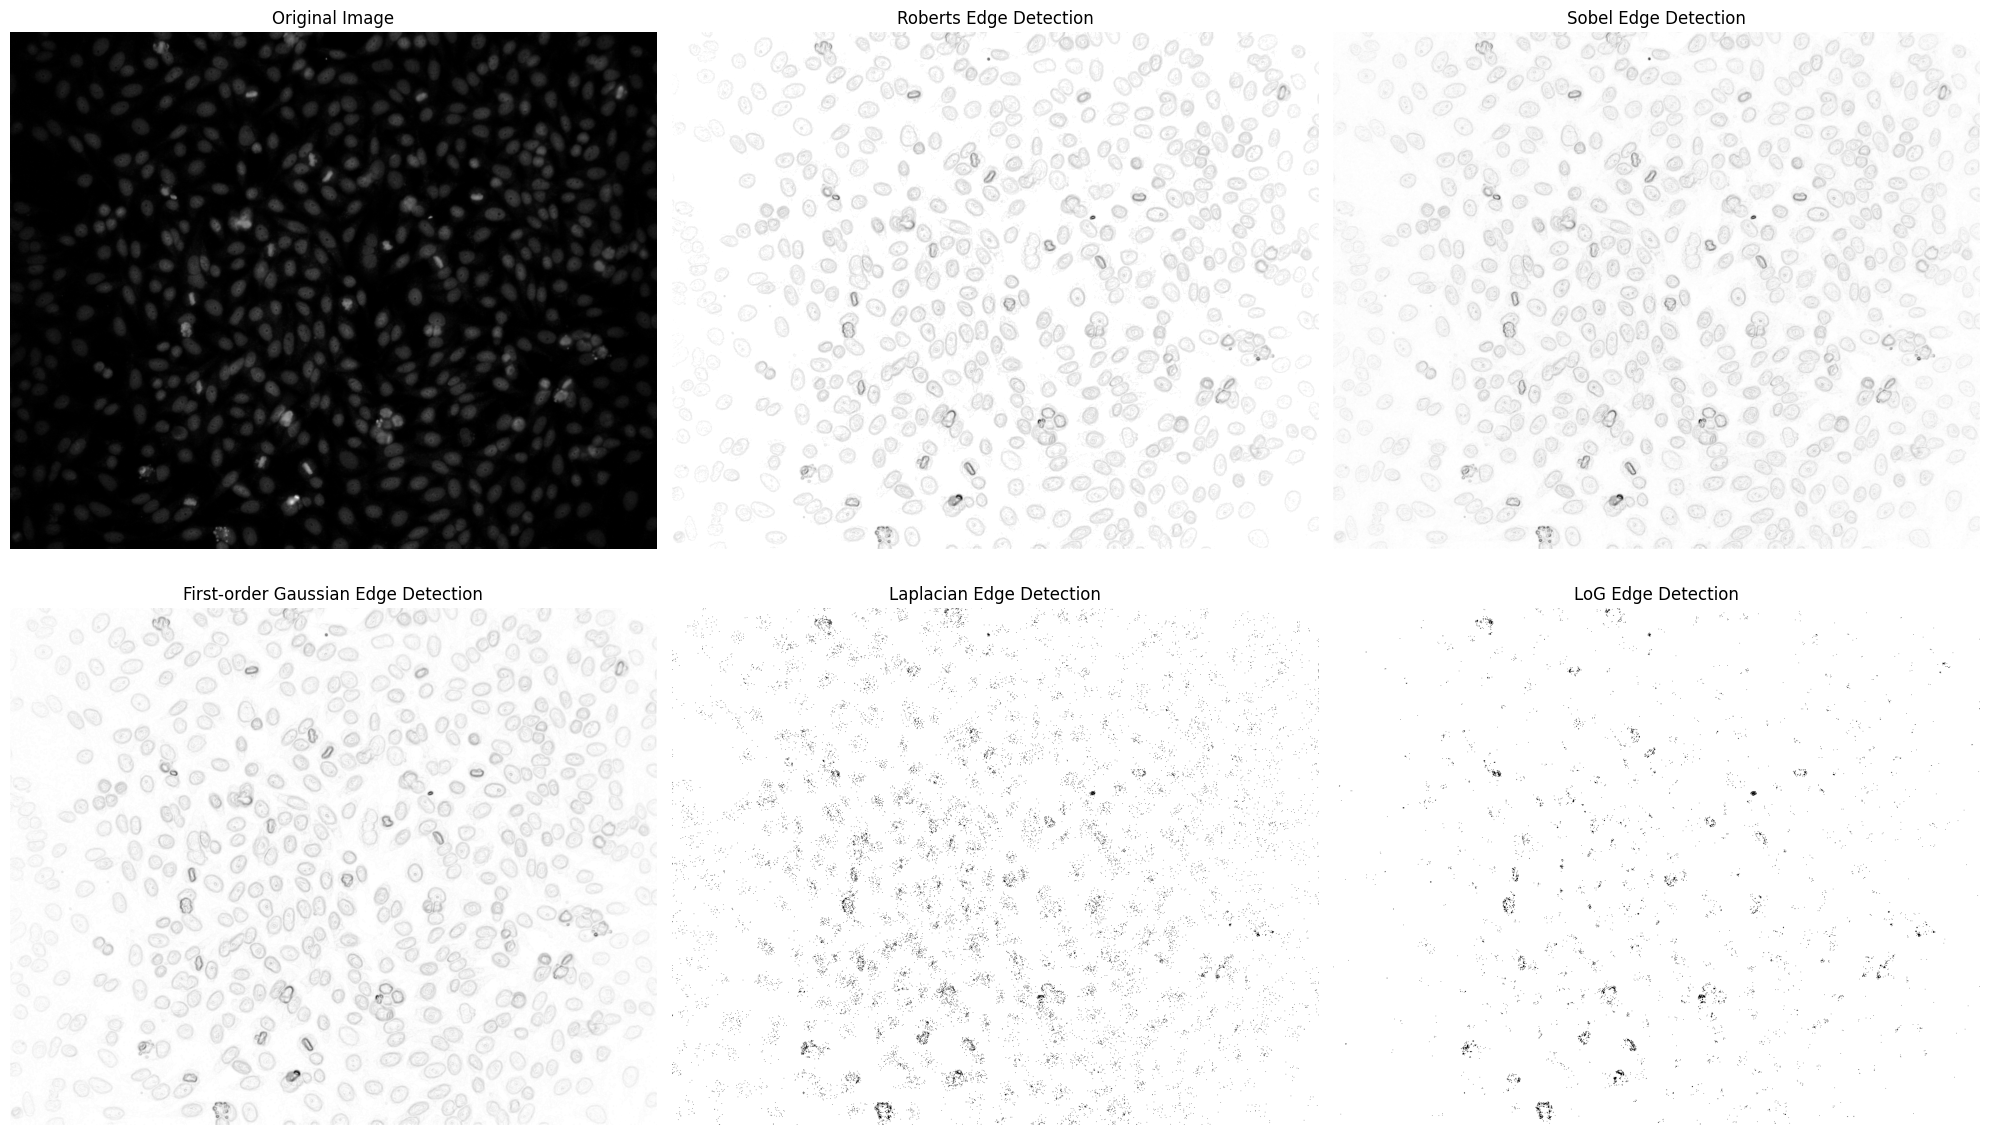


Processing 9343 AM.bmp:


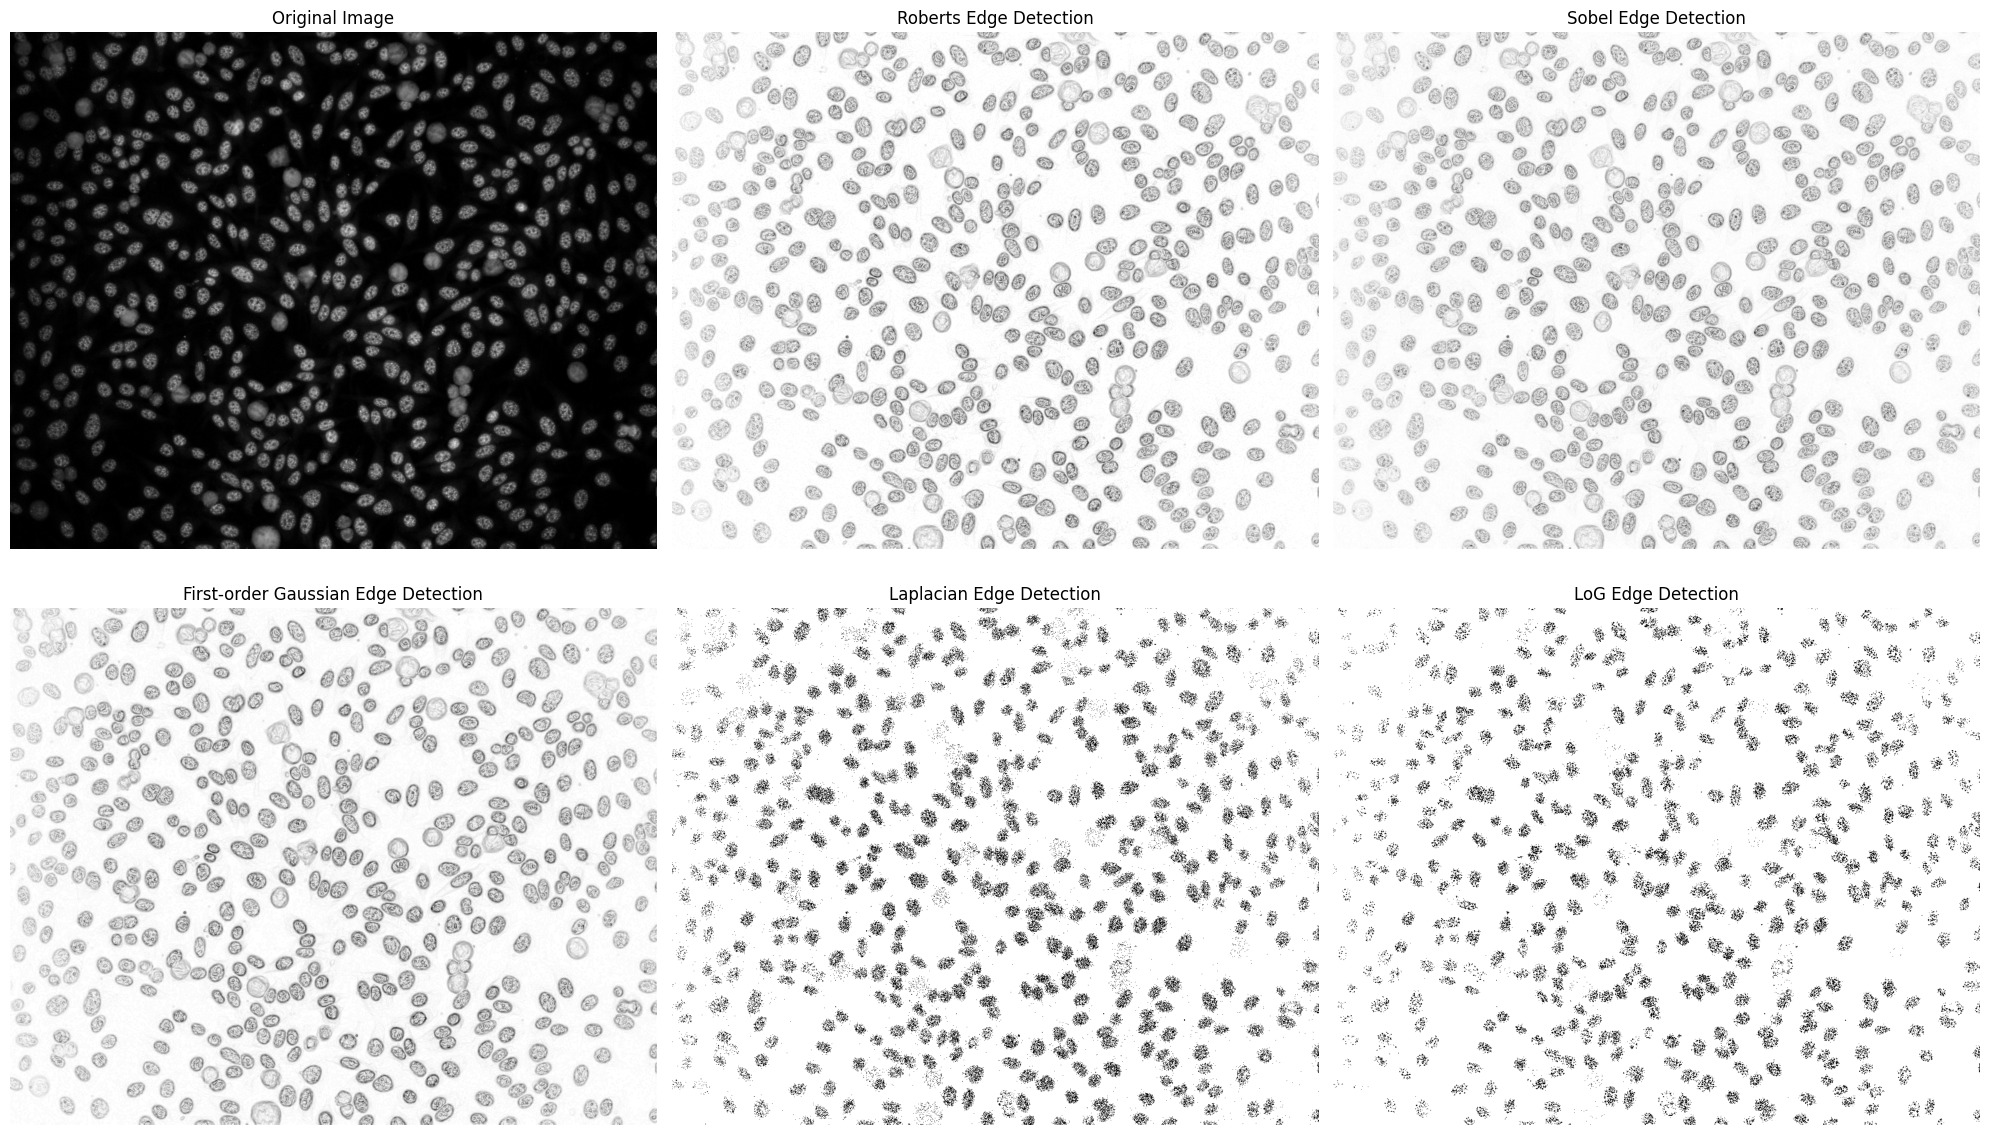

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the different edge detection functions:
def roberts_edge_detection(image, threshold=10): #Roberts edge detection
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    gradient_x = cv2.filter2D(blurred, cv2.CV_64F, kernel_x)
    gradient_y = cv2.filter2D(blurred, cv2.CV_64F, kernel_y)
    magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    magnitude = magnitude / np.max(magnitude) * 255
    magnitude[magnitude < threshold] = 0
    return magnitude.astype(np.uint8)
def sobel_edge_detection(image): #Sobel edge detection
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    return magnitude
def first_order_gaussian_edge_detection(image): #First-order edge detection
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    return magnitude
def laplacian_edge_detection(image, threshold=8): #Laplacian edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    _, thresholded = cv2.threshold(laplacian, threshold, 255, cv2.THRESH_BINARY)
    return thresholded
def laplacian_of_gaussian_edge_detection(image, threshold=15, kernel_size=(3, 3), laplacian_scale=3): #LoG edge detection
    blurred = cv2.GaussianBlur(image, kernel_size, 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=1)
    laplacian = cv2.convertScaleAbs(laplacian) * laplacian_scale
    _, thresholded = cv2.threshold(laplacian, threshold, 255, cv2.THRESH_BINARY)
    return thresholded
# Function to load and process images
def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image
# Function to display processed images using matplotlib
def display_images(images, titles, rows, cols, figsize=(20, 12), cmap='gray'):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()
    for i in range(rows * cols):
        if i < len(images):
            axes[i].imshow(images[i], cmap=cmap)
            axes[i].set_title(titles[i])
            axes[i].axis('off')
        else:
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()
# Function to invert colors of images except the original image
def invert_images(images):
    inverted_images = []
    for img in images:
        if img is not None: inverted_images.append(255 - img)
        else: inverted_images.append(None)
    return inverted_images
# Image paths
original_image_paths = ["10905 JL.bmp", "43590 AM.bmp", "9343 AM.bmp"]
ground_truth_paths = ["10905 JL Edges.bmp", "43590 AM Edges.bmp", "9343 AM Edges.bmp"]
# Loop through images
for original_path, gt_path in zip(original_image_paths, ground_truth_paths):
    print()
    print(f'Processing {original_path}:')
    original_image = process_image(original_path)
    # Apply edge detection
    roberts_edges = roberts_edge_detection(original_image)
    sobel_edges = sobel_edge_detection(original_image)
    gaussian_edges = first_order_gaussian_edge_detection(original_image)
    laplacian_edges = laplacian_edge_detection(original_image)
    log_edges = laplacian_of_gaussian_edge_detection(original_image)
    # Invert colors of edge-detected images
    inverted_images = invert_images([roberts_edges, sobel_edges, gaussian_edges, laplacian_edges, log_edges])
    # Prepare images and titles for display
    images = [original_image] + inverted_images
    titles = ['Original Image', 'Roberts Edge Detection', 'Sobel Edge Detection',
              'First-order Gaussian Edge Detection', 'Laplacian Edge Detection', 'LoG Edge Detection']
    # Display processed images
    display_images(images, titles, 2, 3)

###Task 3 Code

The reason for choosing Canny Edge detection over Marr-Hildreth or Difference of Gaussians (DoG) is mentioned in this table below:

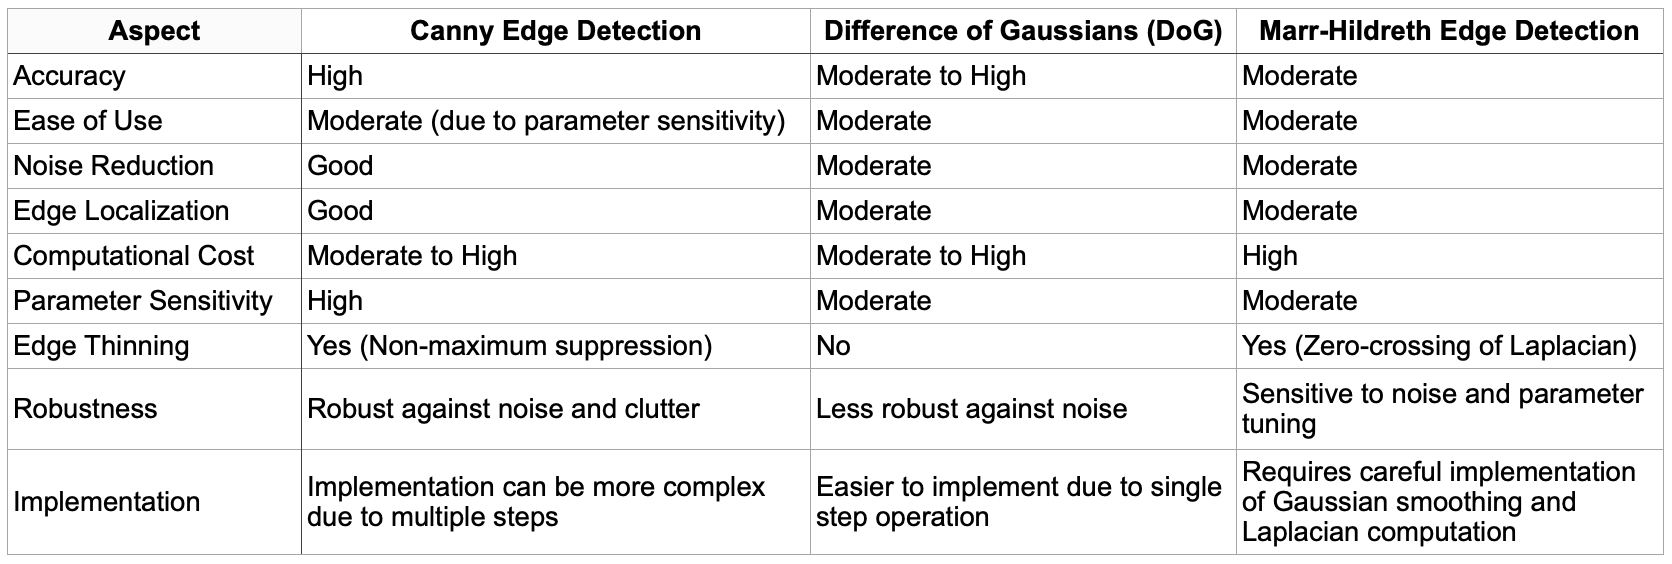



Processing 43590 AM.bmp:
Applying Canny edge detection...


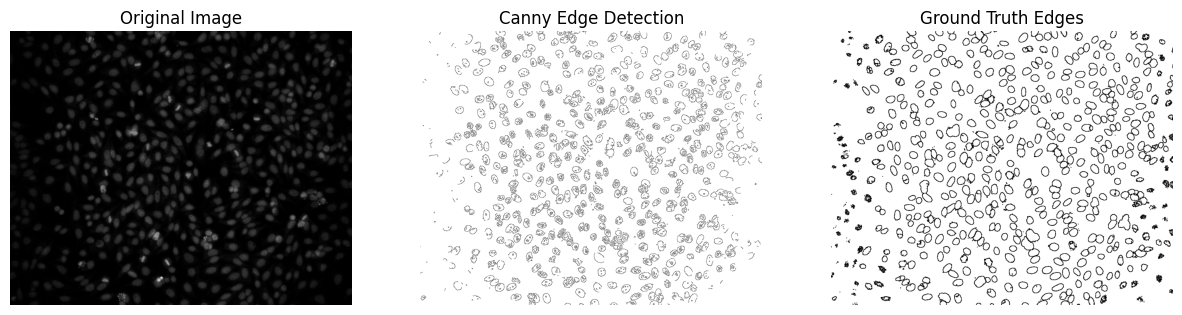


Processing 10905 JL.bmp:
Applying Canny edge detection...


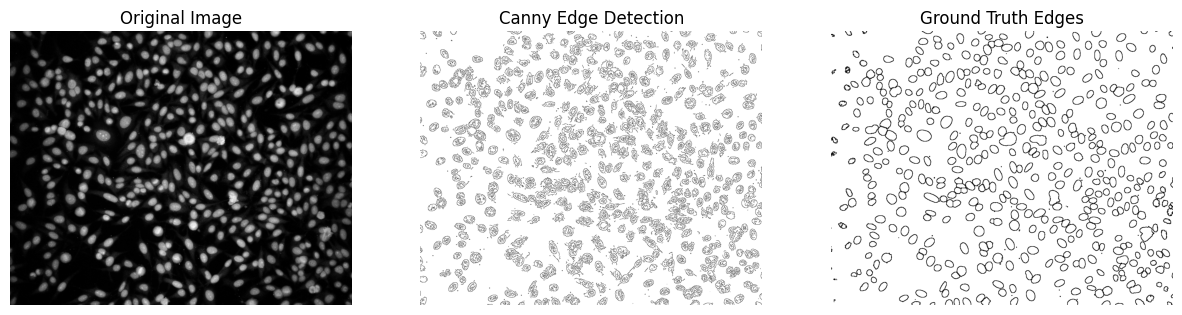


Processing 9343 AM.bmp:
Applying Canny edge detection...


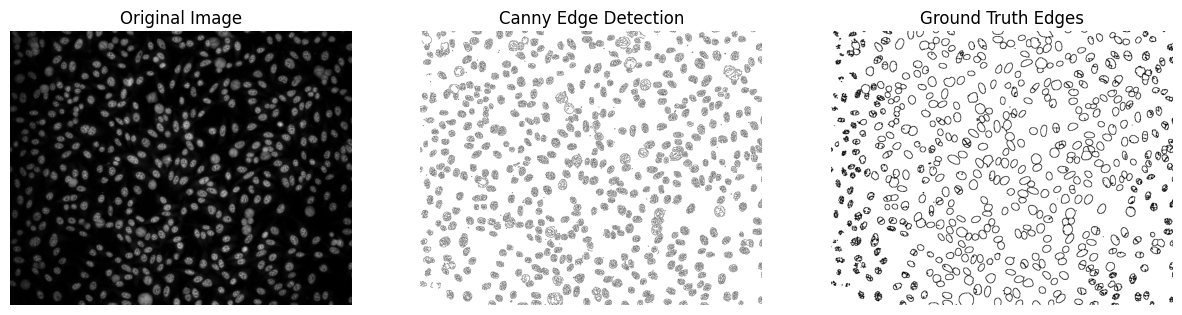

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
# Function to apply Canny edge detection and display results
def apply_canny_edge_detection(image_path, gt_image_path, low_threshold=20, high_threshold=40):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    gt_image = cv2.imread(gt_image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, low_threshold, high_threshold) # Apply Canny edge detection
    plt.figure(figsize=(15, 5)) # Display the original image
    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(132), plt.imshow(edges, cmap='gray_r') # Display the Canny edge image
    plt.title('Canny Edge Detection'), plt.axis('off')
    plt.subplot(133), plt.imshow(gt_image, cmap='gray') # Display ground truth image
    plt.title('Ground Truth Edges'), plt.axis('off')
    plt.show()
folder_path = "/content/"
image_files = ['43590 AM.bmp', '10905 JL.bmp', '9343 AM.bmp']
gt_files = ['43590 AM Edges.bmp', '10905 JL Edges.bmp', '9343 AM Edges.bmp']
# Apply Canny edge detection to each image with corrected thresholds
for image_file, gt_file in zip(image_files, gt_files):
    image_path = os.path.join(folder_path, image_file)
    gt_image_path = os.path.join(folder_path, gt_file)
    print(f'Processing {image_file}:')
    print('Applying Canny edge detection...')
    apply_canny_edge_detection(image_path, gt_image_path)
    print()

###Task 4 Code